# Analyzing the Stroop Effect

### (1) Independent variable & Dependent variable

Independent variable: Whether colors and test words are congruent or not.

Dependent variable: The difference of elapsed time from two tests.

### (2) Hypotheses

The conflicting stimuli of colors and words will make psychological interference, thus the response time of congruent and incongruent test will be different.

The null hypothesis is: 
The congruency of colors and words doesn't affect to human. Thus, there is no difference in population means of reponse time under congruent and incongruent conditions.

\begin{align}
H_0 : \mu_c  & = \mu_i \\
\end{align}


and the alternative hypothesis is: 
The congruency of colors and words affects to human. Thus, there are differences in population means of reponse time under congruent and incongruent conditions.

\begin{align}
H_a : \mu_c  & \not= \mu_i \\
\end{align}




Whereas 
$
\mu_c
$
 is the mean of sample dataset from congruent test,

and $\mu_i$ is the mean of sample dataset from incongruent test.

The T-test will be applied because the size of samples is small and standard deviation of population is unknown. [1]

As each participant was tested twice, it is relevant (paired test).[2]

Because of alternative hypothesis ($\mu_c$ < $\mu_i$ or $\mu_c$ > $\mu_i$), it is two-tailed test.[3]

These will be elaborated further in '(5)' below.

### (3) Descriptive statistics

I will use means for central tendency, and standard deviation for variability.

In [1]:
# Importing packages for analyze
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Reading dataset
stroop = pd.read_csv('stroopdata.csv')
stroop

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [3]:
# Assign variables for convenience
congruent = stroop['Congruent']
incongruent = stroop['Incongruent']

In [4]:
# Mean of 'Congruent test'
congruent.mean()

14.051125000000004

In [5]:
# Standard deviation of 'Congruent test'
congruent.std()

3.559357957645195

In [6]:
# Mean of 'Incongruent test'
incongruent.mean()

22.01591666666667

In [7]:
# Standard deviation of 'Incongruent test'
incongruent.std()

4.797057122469138

In [8]:
# Differences of two tests
incongruent - congruent

0      7.199
1      1.950
2     11.650
3      7.057
4      8.134
5      8.640
6      9.880
7      8.407
8     11.361
9     11.802
10     2.196
11     3.346
12     2.437
13     3.401
14    17.055
15    10.028
16     6.644
17     9.790
18     6.081
19    21.919
20    10.950
21     3.727
22     2.348
23     5.153
dtype: float64

In [9]:
# Difference of means of two tests
(incongruent - congruent).mean()

7.964791666666667

In [10]:
# Increased rate of elapsed time
incongruent.mean() / congruent.mean() * 100

156.68436987548444

Central Tendency:
As you can see above, the mean of the Difference of two tests is 7.9648 second.
Which means in incongruent test, participants take almost 8 seconds more time than congruent test.
While mean of congruent test takes 14.0511 second, it is increased by 56.6844%.

Measure of Variability:
Standard deviation of congruent test is 3.5594.
And standard deviation of incongruent test is 4.7971.
Which means the result of incongruent test is more influenced by individual difference than that of congruent test.

### (4) Visualization

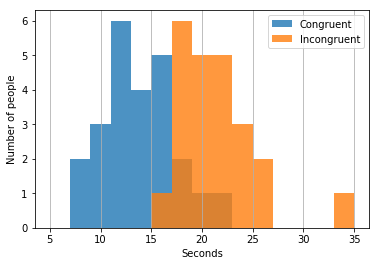

In [11]:
stroop.plot(kind='hist', alpha=0.8, bins=np.arange(5,36,2))
plt.xlabel('Seconds')
plt.ylabel('Number of people')
plt.grid(axis='x')
plt.legend()
plt.show()
plt.clf()

The plot above shows how different between two tests.
Entire recorded seconds divided in 2 seconds-bin.

There is one outlier in plot of Incongruent test.

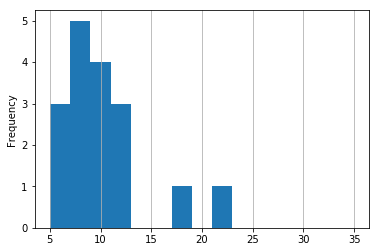

In [12]:
(incongruent - congruent).plot(kind='hist', bins=np.arange(5,36,2))
plt.grid(axis='x')
plt.show()
plt.clf()

The difference between incongruent and congruent test.
We need to test the whether this is normal distribution or not.
It is written below in '(5)'

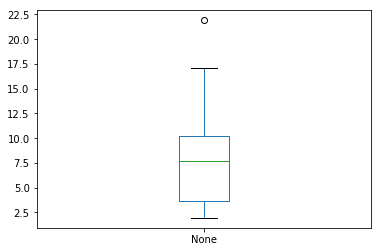

In [13]:
(incongruent - congruent).plot(kind='box')
plt.legend()
plt.show()
plt.clf()

In [14]:
stats.iqr(incongruent - congruent)

6.6130000000000013

This box in the box plot of difference shows the interquartile range (IQR).
And the line in the middle of the box shows mean.

### (5)  Statistical test and Result

Because the size of samples are small (24), the T-test is suitable for this case.
T-test is effective statistical test for small size of sample (normally 5~30 samples).

As each participant was tested twice, it is relevant (paired test).

And because of alternative hypothesis ($\mu_c$ ≠ $\mu_i$, which mean $\mu_c$ < $\mu_i$ or $\mu_c$ > $\mu_i$), it is two-tailed test.

My confidence level is 95%, which means the P-value must less than 0.05 (which called 'α').

But T-test need prerequisites.
That is 'the sample data must be normally distributed'.
And this case, data of two tests are relatively (while same participant did twice).
So the 'Difference of data' must checked whether normally distributed or not.

Here is a method that can check this out: Shapiro-Wilk test.
It is also included in scipy package.

In [15]:
stats.shapiro(incongruent - congruent)

(0.9104195833206177, 0.03601718321442604)

The P-value is 0.0360 (less than 0.05).
And its value can enough to said 'normally distributed'.

Now, performing the T-test:

In [16]:
stats.ttest_rel(congruent, incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

The P-value is small enough (4.1030 * 10^8 which is less than 0.05) to reject the null-hypothesis.
Thus, I will reject the null hypothesis.

### (6) My opinion

I think this result came from priority.
Human reacts texts and colors, but more pretend to react in text.
If the texts written by unknown language, the result from participant will be different from test above.

REFERENCES


[1]
http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/

[2]
https://en.wikipedia.org/wiki/Student%27s_t-test#Unpaired_and_paired_two-sample_t-tests

[3]
http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/null-and-alternative-hypotheses/

[4]
http://psychclassics.yorku.ca/Stroop/

[5]
https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

[6]
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

[7]
https://en.wikipedia.org/wiki/Box_plot

[8]
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

[9]
http://www.scipy-lectures.org/packages/statistics/index.html

[10]
http://www.sthda.com/english/wiki/paired-samples-t-test-in-r

[11]
http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html

[12]
http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

[13]
http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests:-why-we-need-to-use-hypothesis-tests-in-statistics

[14]
https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

[15]
http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/what-is-a-hypothesis-test/

[16]
http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/

[17]
http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/directional-and-nondirectional-hypotheses/

[18]
http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/what-is-a-critical-value/